In [1]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import seaborn as sns
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
# IMPORTING DATA

df = pd.read_csv('creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [3]:
df= pd.read_csv('creditcard.csv',sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [4]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


Text(0, 0.5, 'Frequency')

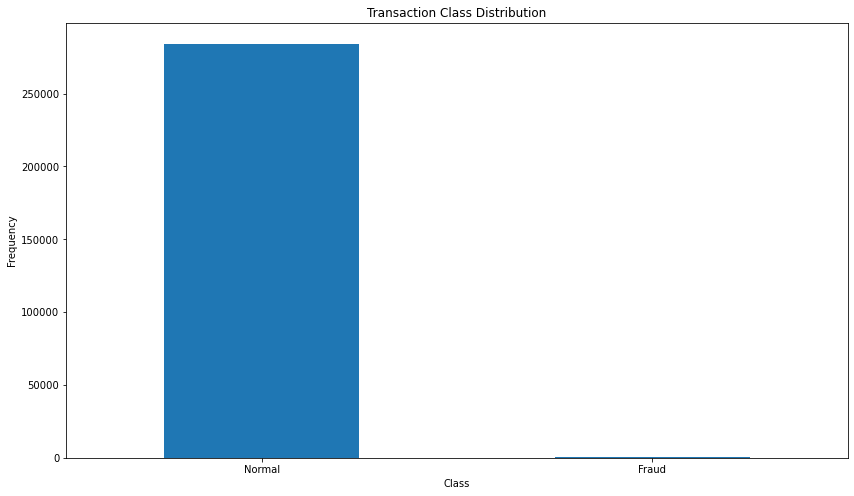

In [21]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [6]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [7]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


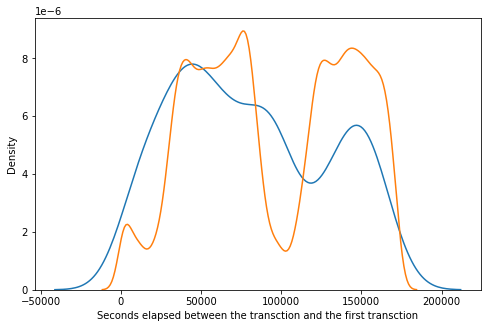

In [8]:
#distribution of class with time
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


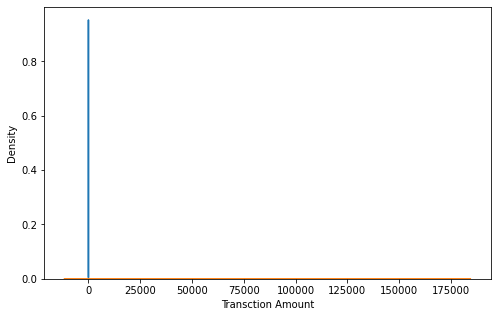

In [9]:
#distribution of class with amount
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

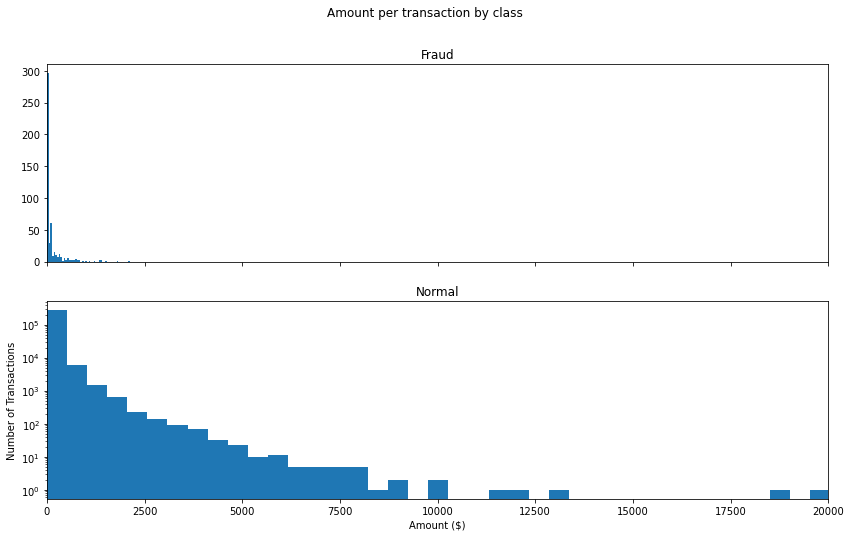

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_cases.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(nonfraud_cases.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [10]:
# DATA SPLIT

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[ 5.31500000e+04 -1.11504743e+00  1.03558276e+00  8.00712441e-01
  -1.06039825e+00  3.26211690e-02  8.53422160e-01 -6.14243480e-01
  -3.23116112e+00  1.53994798e+00 -8.16908791e-01 -1.30559201e+00
   1.08177199e-01 -8.59609580e-01 -7.19342108e-02  9.06655628e-01
  -1.72092961e+00  7.97853221e-01 -6.75939779e-03  1.95677806e+00
  -6.44895565e-01  3.02038533e+00 -5.39617976e-01  3.31564886e-02
  -7.74945766e-01  1.05867812e-01 -4.30853482e-01  2.29736936e-01
  -7.05913036e-02 -3.01454177e-01]]
X_test samples :  [[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 -4.83411518e-02
  -6.07204308e-01  1.25982115e+00 -9.17607168e-02  1.15910150e+00
  -1.24334606e-01 -1.74639536e-01 -1.64440065e+00 -1.11886302e+00
   2.02647310e-01  1.14596495e+00 -1.80235956e+00 -2.47177932e-01
  -6.09453515e-02  8.46605738e-01  3.79454387e-01  8.47262245e-01
   1.86409421e-01 -2.07098267e-01 -4.33890272e-01 -2.61613283e-01
  -4.66506063e-02  2.11512300e-01  8.29721214e-03  1.08494430e-01
   

In [9]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [10]:
# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [11]:
# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [12]:
# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [13]:
# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [14]:
# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\santo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9993328885923949
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994908886626171
------------------------------------------------------------------------


In [16]:
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7865168539325842
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8449197860962566
------------------------------------------------------------------------


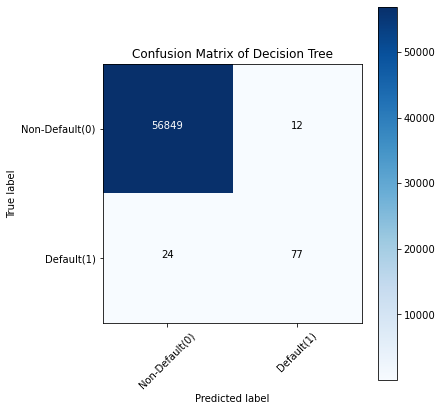

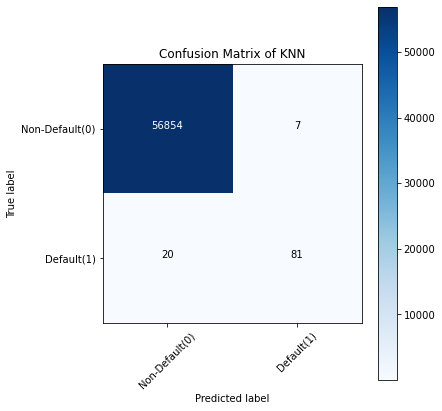

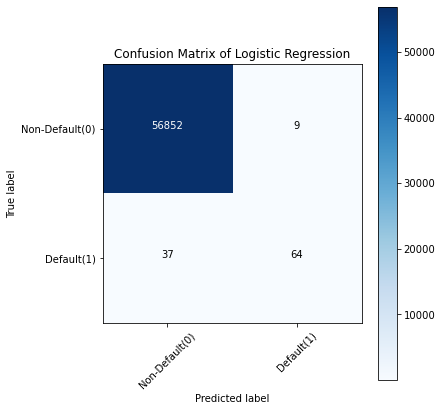

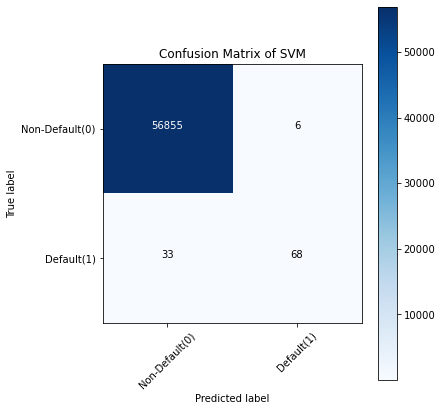

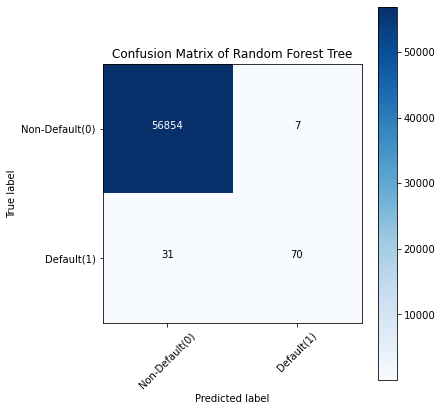

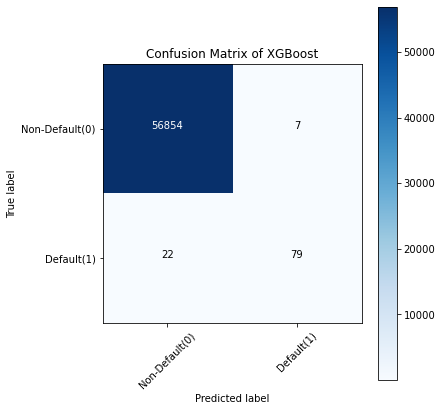

In [17]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()